<a href="https://colab.research.google.com/github/neuroqudit/pykoppu/blob/main/notebooks/07_sat3_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-SAT Problem with KOPPU

This notebook demonstrates solving the 3-Satisfiability (3-SAT) problem using the KOPPU OPU. The goal is to determine if there exists an interpretation that satisfies a given Boolean formula.

## 1. Problem Formulation

Given a Boolean formula in Conjunctive Normal Form (CNF) where each clause has exactly 3 literals:

$$ \phi = C_1 \wedge C_2 \wedge \dots \wedge C_M $$

Where $C_m = (l_{m,1} \vee l_{m,2} \vee l_{m,3})$.

We want to find a truth assignment to variables $x_1, \dots, x_N$ such that $\phi$ is TRUE.

In [1]:
!pip install pykoppu==0.2.34a0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.2 MB/s eta 0:00:00


In [2]:
import pykoppu as pk

# 1. Define 3-SAT Instance
n_vars = 4
# Clauses: (1, 2, -3) means (x1 OR x2 OR NOT x3)
clauses = [
    (1, 2, -3),
    (-1, -2, 3),
    (1, -2, 4),
    (-1, 3, -4)
]

penalty = 2.0

## 2. PUBO Mapping

We map 3-SAT to the Maximum Independent Set (MIS) problem on a constructed graph.

1.  **Graph Construction**: Create a node for each literal in each clause ($3M$ nodes). Add edges between literals in the same clause (cliques) and between conflicting literals ($x$ and $\neg x$).
2.  **MIS Formulation**: Finding a satisfying assignment is equivalent to finding an independent set of size $M$ (one literal per clause, no conflicts).

The Hamiltonian $H$ for MIS is:

$$ H = -\sum_{i} y_i + P \sum_{(i,j) \in E} y_i y_j $$

Where $y_i$ is the binary variable for selecting node $i$ (literal instance).

### Tensors and Solver Process

1.  **Tensors**: The linear term $-1$ encourages selecting nodes (bias $h$). The quadratic term $P$ penalizes selecting connected nodes (coupling $J$).
2.  **Solver Process**: The OPU relaxes to a state that maximizes the number of selected nodes without violating independence (no connected nodes selected). If the final energy corresponds to selecting $M$ nodes, the formula is satisfiable.

Mapping to OPU...
Solving...
Visualizing OPU Dynamics...


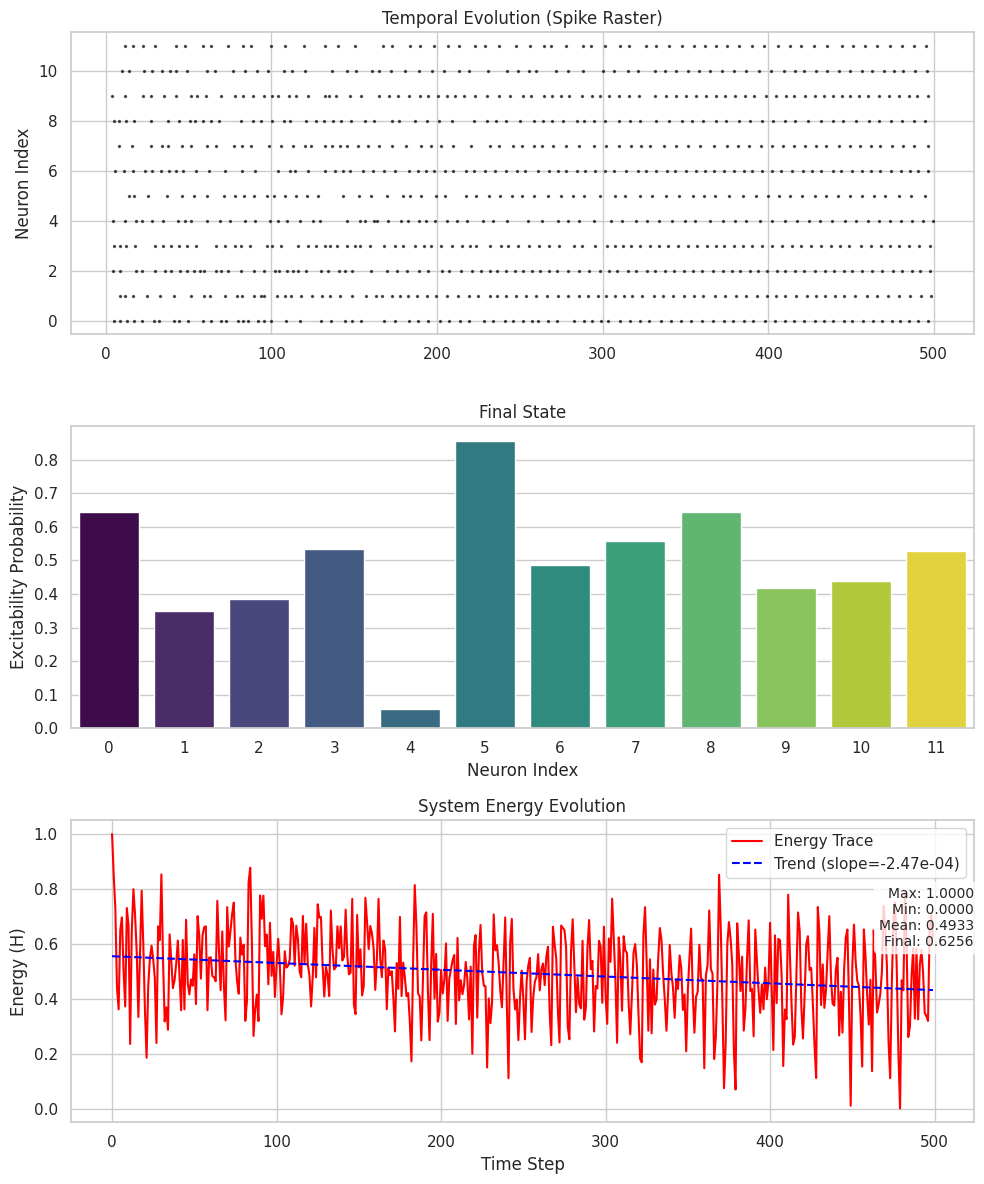

In [3]:
# 2. Create 3-SAT Problem
print("Mapping to OPU...")
problem = pk.problems.math.SAT3(clauses, n_vars, penalty)

# 3. Solve
print("Solving...")
process = pk.oos.Process(problem, backend='cpu', t=500)
result = process.run()

# 4. Display OPU Dynamics
print("Visualizing OPU Dynamics...")
result.plot()

## 3. Solution Analysis

We visualize the graph. Green nodes are selected literals. If one node per triangle is selected and no conflicts exist, we have a solution.

Visualizing Solution...


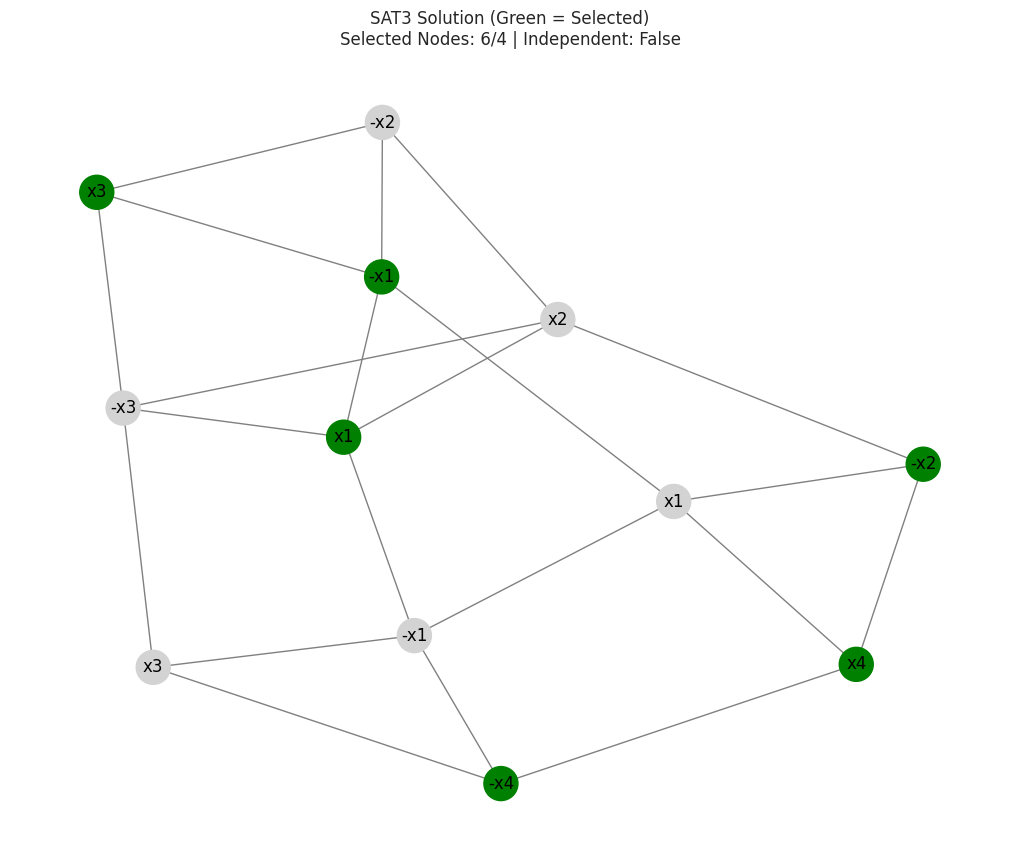


Truth Assignment: {1: False, 3: True, 2: False, 4: False}


In [4]:
# 5. Analyse Solution
print("Visualizing Solution...")
problem.plot(result, threshold=0.5)

# Decode
assignment = problem.decode_solution(result, threshold=0.5)
print("\nTruth Assignment:", assignment)